### Урок 3. Логистическая регрессия. Log Loss

In [83]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [85]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [86]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [87]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [88]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [89]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [76]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [77]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [78]:
z = np.linspace(-10, 10, 101)

In [79]:
probabilities = sigmoid(z)

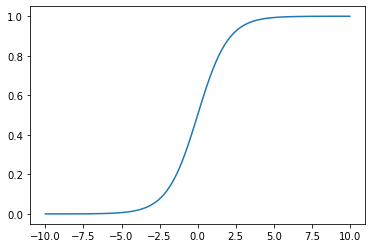

In [90]:
plt.plot(z, probabilities)
plt.show()

In [91]:
def eval_model(X, y, iterations, alpha=1e-4):
    i_value=[]
    logloss_value=[]
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
        i_value.append(i)
        logloss_value.append(err)
    return{'W':W,'i':i_value,'logloss':logloss_value} 

In [92]:
eval_model_dict = eval_model(X_st, y, iterations=5000, alpha=1e-4)
W = eval_model_dict['W']
i_value=eval_model_dict['i']
logloss_value=eval_model_dict['logloss']
logloss_value[-1]

500 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
1500 [ 0.44435675 -0.33951515  0.64152026  1.44406912] 0.8478360281905125
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.765117774502237
2500 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105478
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442177
3500 [ 0.39088925 -0.53321212  0.63401986  1.36601535] 0.6097021563515638
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
4500 [ 0.37108342 -0.59102182  0.63446603  1.3413119 ] 0.5657147376221167
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.553273778823678


0.553273778823678

### Домашнее задание

#### 1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [93]:
# :)

def calc_logloss_0(y, y_pred):
    if np.where(y != 0):
        err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
        err = np.sum(err)
    return err

#### 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

Поскольку не сказанно как подбирать аргументы, подберу их вручную методом научного тыка. Хотел написать функцию но что-то сложновато пошло.

500 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
1500 [ 0.44435675 -0.33951515  0.64152026  1.44406912] 0.8478360281905125
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.765117774502237
2500 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105478
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442177
3500 [ 0.39088925 -0.53321212  0.63401986  1.36601535] 0.6097021563515638
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
4500 [ 0.37108342 -0.59102182  0.63446603  1.3413119 ] 0.5657147376221167
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.553273778823678


0.553273778823678

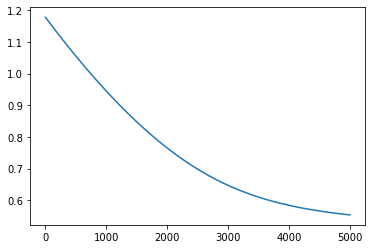

In [94]:
eval_model_dict = eval_model(X_st, y, iterations=5000, alpha=1e-4)
W = eval_model_dict['W']
i_value=eval_model_dict['i']
logloss_value=eval_model_dict['logloss']
plt.plot(i_value, logloss_value)
logloss_value[-1]

500 [ 0.30079678 -0.70031444  0.66308276  1.28874116] 0.5201633776043038
1000 [ 0.21868932 -0.7169891   0.72740228  1.28032009] 0.5084394737153237
1500 [ 0.1515603  -0.71596756  0.78093129  1.28995944] 0.5009445647172969
2000 [ 0.09281728 -0.71711216  0.82373888  1.30616901] 0.4953800576181626
2500 [ 0.04043214 -0.72055788  0.85796998  1.32691073] 0.4910116475819201
3000 [-0.00704628 -0.72563311  0.88543002  1.35091564] 0.48739519811315557
3500 [-0.05074596 -0.73180304  0.90753117  1.37720416] 0.48426417689684553
4000 [-0.09153705 -0.73867267  0.9253656   1.4050246 ] 0.4814587290836302
4500 [-0.13008517 -0.74595324  0.93977534  1.4338092 ] 0.47888212042508815
5000 [-0.16689678 -0.75343529  0.95140969  1.46313484] 0.4764747437107683


0.4764747437107683

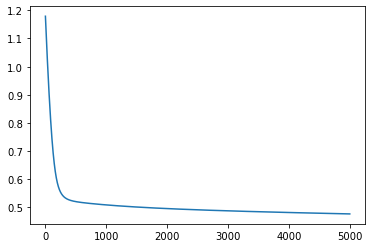

In [95]:
eval_model_dict = eval_model(X_st, y, iterations=5000, alpha=.002)
W = eval_model_dict['W']
i_value=eval_model_dict['i']
logloss_value=eval_model_dict['logloss']
plt.plot(i_value, logloss_value)
logloss_value[-1]

1000 [ 0.09278724 -0.71712315  0.82381643  1.30618327] 0.49538488745431764
2000 [-0.09155731 -0.73868661  0.92542649  1.40504537] 0.4814616210146691
3000 [-0.23676586 -0.76846103  0.96829363  1.52227452] 0.47203231478275454
4000 [-0.36741764 -0.79662872  0.98454321  1.63794247] 0.464145055181969
5000 [-0.49164637 -0.8209529   0.98627038  1.74691401] 0.4571643968072962
6000 [-0.61217801 -0.84137391  0.97868127  1.84861658] 0.45082476076177225
7000 [-0.72997111 -0.85837716  0.96445594  1.94370734] 0.4449704002898165
8000 [-0.84539584 -0.87251658  0.94523274  2.03306377] 0.43949968626764147
9000 [-0.95862049 -0.88428853  0.92214743  2.11750296] 0.43434328101548375
10000 [-1.0697409  -0.89410962  0.89604987  2.19772161] 0.42945239810558433


0.42945239810558433

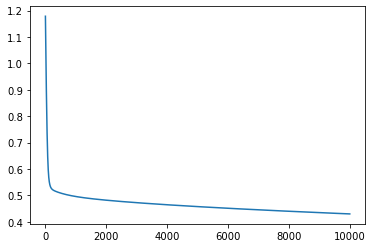

In [102]:
eval_model_dict = eval_model(X_st, y, iterations=10000, alpha=.004)
W = eval_model_dict['W']
i_value=eval_model_dict['i']
logloss_value=eval_model_dict['logloss']
plt.plot(i_value, logloss_value)
logloss_value[-1]

0.42945239810558433 - выглядит достаточно неплохо.

#### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [103]:
def calc_pred_proba(w, x):
    return sigmoid(np.dot(w,x))

W = eval_model(X_st, y, iterations=10000, alpha=0.004)['W']
p = calc_pred_proba(W, X_st)
p

1000 [ 0.09278724 -0.71712315  0.82381643  1.30618327] 0.49538488745431764
2000 [-0.09155731 -0.73868661  0.92542649  1.40504537] 0.4814616210146691
3000 [-0.23676586 -0.76846103  0.96829363  1.52227452] 0.47203231478275454
4000 [-0.36741764 -0.79662872  0.98454321  1.63794247] 0.464145055181969
5000 [-0.49164637 -0.8209529   0.98627038  1.74691401] 0.4571643968072962
6000 [-0.61217801 -0.84137391  0.97868127  1.84861658] 0.45082476076177225
7000 [-0.72997111 -0.85837716  0.96445594  1.94370734] 0.4449704002898165
8000 [-0.84539584 -0.87251658  0.94523274  2.03306377] 0.43949968626764147
9000 [-0.95862049 -0.88428853  0.92214743  2.11750296] 0.43434328101548375
10000 [-1.0697409  -0.89410962  0.89604987  2.19772161] 0.42945239810558433


array([0.3443677 , 0.43185017, 0.75430418, 0.01736917, 0.82070551,
       0.69095654, 0.88319426, 0.17893848, 0.32381682, 0.82972521])

#### 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [104]:
def calc_pred(W, X):
    return np.round(calc_pred_proba(W, X), 0)

y_pred = calc_pred(W, X_st)
print('y_pred:',y_pred)
print('y:     ',y)

y_pred: [0. 0. 1. 0. 1. 1. 1. 0. 0. 1.]
y:      [0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]


#### 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [105]:
err_matrix = np.zeros((2, 2))
for i in range(len(y)):
    if y_pred[i] == 1 and y[i] != 0:
        err_matrix[0][0] += 1
    elif y_pred[i] == 1 and y[i] != 1:
        err_matrix[0][1] += 1
    elif y_pred[i] == 0 and y[i] != 1:
        err_matrix[1][1] += 1
    else:
        err_matrix[1][0] += 1
err_matrix

array([[4., 1.],
       [1., 4.]])

In [106]:
def precision(err_matrix):
    return err_matrix[0][0] / (err_matrix[0][0] + err_matrix[0][1])

def recall(err_matrix):
    return err_matrix[0][0] / (err_matrix[0][0] + err_matrix[1][0])

In [107]:
precision(err_matrix)

0.8

In [108]:
recall(err_matrix)

0.8

In [109]:
def f_measure(err_matrix):
    return (2 * precision(err_matrix) * recall(err_matrix)/(precision(err_matrix) + recall(err_matrix)))

In [110]:
f_measure(err_matrix)

0.8000000000000002

#### 6. ВОПРОС:Могла ли модель переобучиться? Почему?

Несмотря на дискретность признаков, модель может переобучиться. Это возможно, т.к. подбирая аргументы функции eval_model можно добиться практически точного соответствия прогноза со значениями тестового набора данных в котором могут быть выбросы, что в свою очередь повлияет на точность при работе с новыми данными. В этом смысле модель логистической регрессии принципиально не отличается от линейной.